<h2> Load IRIS dataset  </h2>

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
x = iris.data
y = iris.target

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target'])

# df['target'] = iris.target

df.head(10)



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
target               0.0
Name: 0, dtype: float64


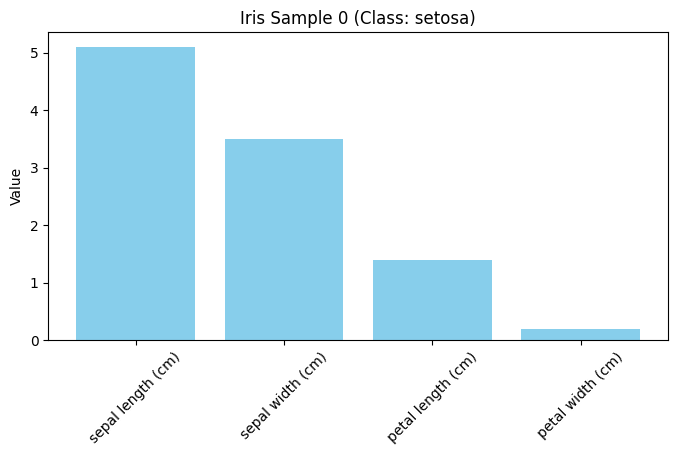

In [6]:
first_sample = df.iloc[0]

print(first_sample)


target_value = int(first_sample['target'])



# Plot the feature values of the first sample
plt.figure(figsize=(8, 4))
plt.bar(df.columns[:-1], first_sample[:-1], color='skyblue')
plt.title(f'Iris Sample {target_value} (Class: {iris.target_names[target_value]})')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Target is the numerical representation of class of IRIS flower

species = []

for i in range(len(df['target'])):
    if df['target'][i] == 0:
        species.append("setosa")
    elif df['target'][i] == 1:
        species.append("versicolor")
    else:
        species.append('virigincia')


df['species'] = species



In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virigincia
146,6.3,2.5,5.0,1.9,2.0,virigincia
147,6.5,3.0,5.2,2.0,2.0,virigincia
148,6.2,3.4,5.4,2.3,2.0,virigincia


In [9]:
df.describe()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<h2> Visualize the dataset </h2>

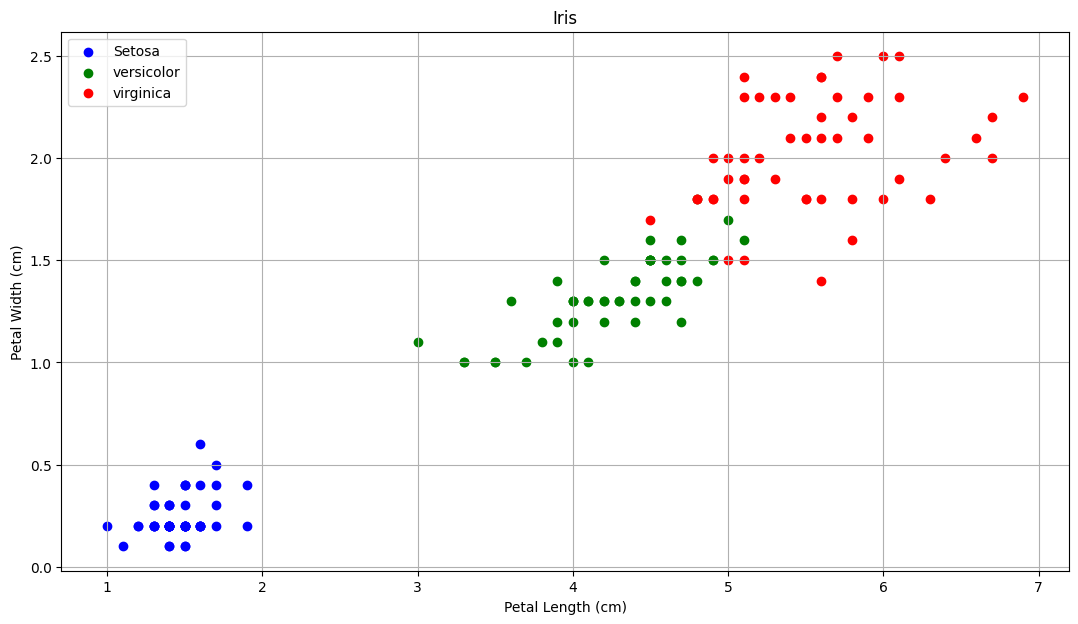

In [10]:


setosa = df[df.species == "setosa"]
versicolor = df[df.species == "versicolor"]
virginica = df[df.species == "virigincia"]


fig, ax = plt.subplots()
fig.set_size_inches(13,7)

ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label = "Setosa", facecolor = 'blue')
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label = "versicolor", facecolor = 'green')
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label = "virginica", facecolor = 'red')


ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.grid()
ax.set_title('Iris')
ax.legend()





In [21]:
from collections import Counter

class KNN:

    def __init__(self, k = 3):
        self.k = k 

    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.y_train = y_train

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1- x2) ** 2))
    
    def predict(self, x_test):
        predictions = [self._predict(x) for x in x_test]
        return np.array(predictions)



    def _predict(self, x):

        # Calculate distances from the point x to all training data
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]

        # Extract the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Majority voting
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]



In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


knn = KNN(3)
knn.fit(X_train, y_train)



In [24]:
y_pred = knn.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [25]:
def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

def pca(X, num_components=2):
    # Standardize the data
    X_standardized = standardize(X)
    # Compute covariance matrix
    covariance_matrix = np.cov(X_standardized.T)
    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors by descending eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]
    # Select the top num_components eigenvectors
    principal_components = eigenvectors_sorted[:, :num_components]
    # Project the data onto the principal components
    X_pca = X_standardized.dot(principal_components)
    return X_pca

# Apply PCA to reduce to 2 dimensions
X_reduced = pca(x, num_components=2)

# Split the reduced data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Initialize k-NN classifier
knn_pca = KNN(k=3)
knn_pca.fit(X_train_pca, y_train)

# Make predictions on the reduced test set
y_pred_pca = knn_pca.predict(X_test_pca)

# Calculate accuracy after PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy after PCA: {accuracy_pca * 100:.2f}%")


Accuracy after PCA: 93.33%
